In [48]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv('train.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
df.shape

(27481, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [9]:
data = df[['text']]
data.head()

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."


In [10]:
data.isnull().any().sum()

1

In [12]:
data.dropna(axis=0, inplace=True)
data.isnull().any().sum()

0

In [14]:
# convert text to lower case
data['text'] = data['text'].str.lower()
data.head()

,text
0,"i`d have responded, if i were going"
1,sooo sad i will miss you here in san diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"sons of ****, why couldn`t they put them on t..."


In [21]:
# remove stop words(unnecessary and repetitive words) from the text
stop_words = STOPWORDS
print(stop_words)

{'being', 'than', 'himself', 'r', 'however', "she's", "wasn't", 'all', 'since', 'when', 'no', 'such', 'did', "you'll", 'where', 'you', "where's", 'hers', 'there', "when's", 'his', 'shall', 'had', 'her', "i'd", 'most', 'over', "didn't", "can't", 'on', 'and', 'off', 'again', 'same', 'against', 'until', 'be', "they've", 'each', 'with', 'therefore', "weren't", 'do', "you'd", "you're", 'above', 'should', 'nor', 'can', 'after', 'some', 'was', 'what', 'why', 'which', 'from', 'out', 'who', "he'd", 'hence', 'having', 'also', 'have', 'few', 'further', "what's", "how's", "mustn't", 'below', 'if', 'own', 'myself', "she'd", "don't", 'down', "let's", "shan't", "shouldn't", 'an', 'cannot', 'these', 'very', 'are', 'here', 'at', 'before', 'during', 'themselves', 'me', 'my', 'is', "couldn't", 'we', "why's", 'to', "we'd", 'as', "hasn't", "he'll", "i've", 'yourselves', 'those', "who's", "won't", 'for', 'he', 'ours', "they'll", 'of', 'up', "haven't", 'they', "i'm", "hadn't", 'them', "she'll", 'between', 'e

In [22]:
data['text'] = data['text'].astype(str)
data['text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
data.head()

,text
0,"i`d responded, going"
1,sooo sad will miss san diego!!!
2,boss bullying me...
3,interview! leave alone
4,"sons ****, couldn`t put releases already bought"


In [23]:
# check for links in text
data.iloc[5]

text    http://www.dothebouncy.com/smf - shameless plu...
Name: 5, dtype: object

In [24]:
# remove links from text but leave the data
data['text'] = data['text'].apply(lambda x: re.sub(r"http\S+", "", x))
data['text'] = data['text'].apply(lambda x: re.sub(r"www\.\S+", "", x))
data.iloc[5]

text     - shameless plugging best rangers forum earth
Name: 5, dtype: object

In [25]:
# check for numbers
data.iloc[6]

text    2am feedings baby fun smiles coos
Name: 6, dtype: object

In [26]:
# remove numbers from text
data['text'] = data['text'].apply(lambda x: re.sub(r"\d", "", x))
data.iloc[6]

text    am feedings baby fun smiles coos
Name: 6, dtype: object

In [27]:
# remove email addresses from text
data['text'] = data['text'].apply(lambda x: re.sub(r"\w+@\w+\.com", "", x))

In [28]:
# check for punctuation
data.iloc[1]

text    sooo sad will miss san diego!!!
Name: 1, dtype: object

In [29]:
# remove punctuation from text
data['text'] = data['text'].apply(lambda x: re.sub(r"[.,;:!\?\"'`]", "", x))
data.iloc[1]

text    sooo sad will miss san diego
Name: 1, dtype: object

In [31]:
# check special characters
data.iloc[4]

text    sons **** couldnt put releases already bought
Name: 4, dtype: object

In [32]:
# remove special characters
data['text'] = data['text'].apply(lambda x: re.sub(r"[@#\$%^&*\(\)\\/\+-_=\[\]\{\}<>]", "", x))
data.iloc[4]

text    sons  couldnt put releases already bought
Name: 4, dtype: object

# **Lemmatization**

In [34]:
data[['text']].head()

,text
0,id responded going
1,sooo sad will miss san diego
2,boss bullying me
3,interview leave alone
4,sons couldnt put releases already bought


In [36]:
# apply lemmatization
wnl = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: " ".join(wnl.lemmatize(word, "v") for word in x.split()))
data.head()

,text
0,id respond go
1,sooo sad will miss san diego
2,boss bully me
3,interview leave alone
4,sons couldnt put release already buy


# **Word Cloud**

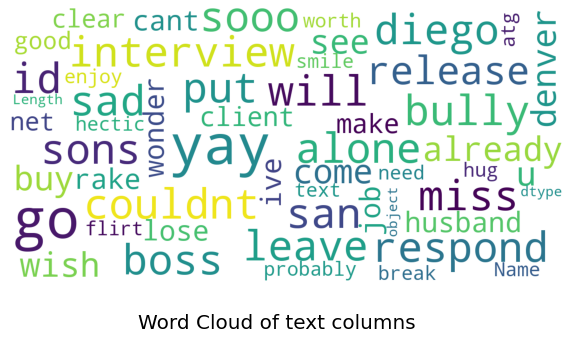

In [41]:
# create word cloud
stopwords = set(STOPWORDS)
def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='white',
                          stopwords = stopwords,
                          max_font_size = 40,
                          scale = 3, 
                          random_state = 1,).generate(str(data))
    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(data['text'], 'Word Cloud of text columns')

In [43]:
# word count for 50 most frequent words
pd.Series(' '.join(data['text']).split()).value_counts()[:50]

im         3023
go         2824
day        2086
get        1592
good       1549
now        1517
work       1482
love       1340
dont       1200
its        1195
today      1097
think      1082
time       1077
know       1038
cant       1023
see        1007
want        983
happy       976
make        974
one         971
miss        964
lol         951
thank       947
u           931
really      908
will        903
back        897
feel        869
mother      788
well        744
night       744
new         740
come        723
home        723
look        715
it          699
need        695
still       679
say         678
oh          664
much        659
watch       646
great       611
wish        611
you         610
last        594
hope        589
me          571
morning     556
haha        555
dtype: int64

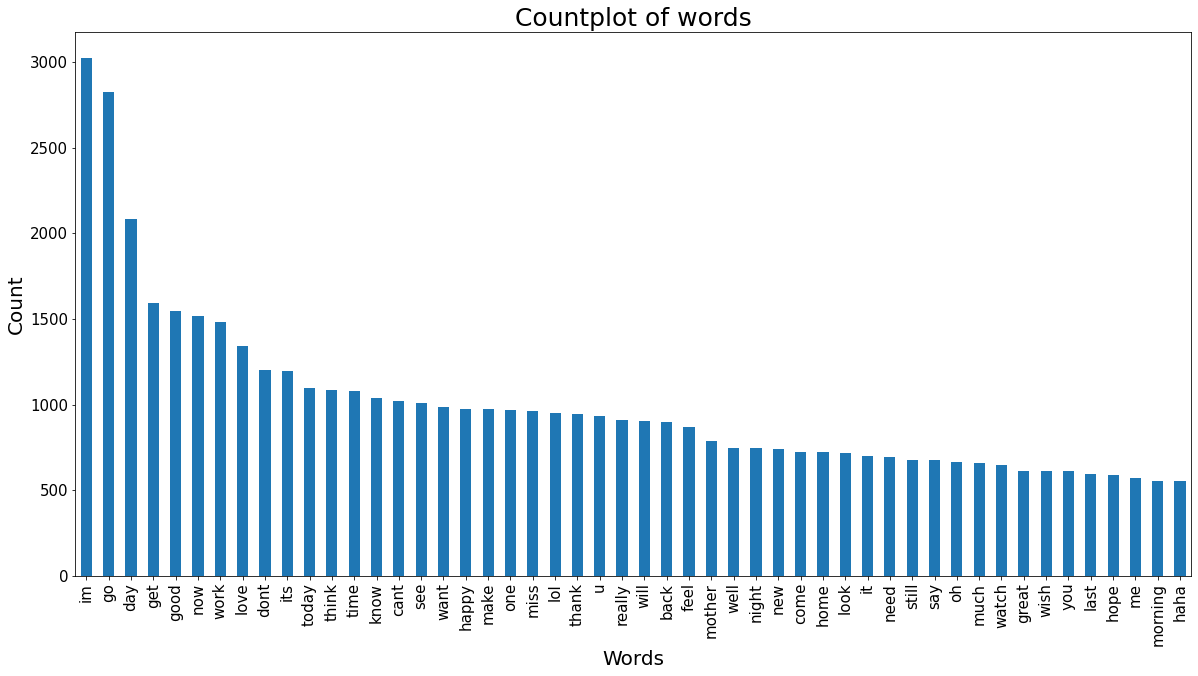

In [44]:
plt.figure(figsize=[20, 10])
pd.Series(' '.join(data['text']).split()).value_counts()[:50].plot(kind='bar')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Countplot of words', fontsize=25)
plt.show()

# **Tokenization**

In [45]:
data[['text']].head()

,text
0,id respond go
1,sooo sad will miss san diego
2,boss bully me
3,interview leave alone
4,sons couldnt put release already buy


In [49]:
data['text'] = data['text'].apply(lambda x: word_tokenize(x))
data[['text']].head()

,text
0,"[id, respond, go]"
1,"[sooo, sad, will, miss, san, diego]"
2,"[boss, bully, me]"
3,"[interview, leave, alone]"
4,"[sons, couldnt, put, release, already, buy]"
